# **Setup and load data**

> Indented block



In [1]:
!pip install tensorflow  opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# see the dependencies that are intsalled
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.9.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheControl                  0.12.11
cachetools                    5.3.0
cata

In [3]:
! install tensorflow-gpu

install: missing destination file operand after 'tensorflow-gpu'
Try 'install --help' for more information.


In [4]:
import tensorflow as tf
import os #used to navigate through file structures

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth. avoid tensorflow for eating up our memory on computer
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

remove bad images

In [10]:
import cv2 #computer vision
import imghdr #check file extensions
from matplotlib import pyplot as plt

In [23]:
rmdir /content/data/.ipynb_checkpoints


In [26]:
os.listdir(data_dir) #show the list of files in data dir

['sad', 'happy']

In [25]:
#creating a variable to the data dir
data_dir = 'data'

In [27]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [28]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)



Image not in ext list data/sad/Vanessa-Ives-Season-2.jpg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/sad/20569227-3d-people-man-person-pain-worried-sad-stress-concept-depressed.jpg
Image not in ext list data/sad/depressed-man-studio-shot-260nw-404652526.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/50740738-sad-people-s-portraits.jpg
Image not in ext list data/sad/CC_HE_1221887081_SituationalDepression-650x428.jpg
Image not in ext list data/sad/5TRX6BRpc.gif
Image not in ext list data/happy/56f455011e0000b300705475.jpeg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/2560px-Happy_People.jpg
Image not in ext list data/happy/traitshappypeople.jpg.webp
Image not in ext list data/happy/tumblr_nhmr7u3EwN1t0f6o2o3_400.gif
Image not in ext list data/happy/cheerful-middl

# Load the data

In [63]:
import numpy as np
data = tf.keras.utils.image_dataset_from_directory('data') # dataset api, that allows to build dataset pipelines

Found 164 files belonging to 2 classes.


In [64]:
data_iterator = data.as_numpy_iterator() #allow acess to data pipeline

In [65]:
batch= data_iterator.next() #allow you to access the batches

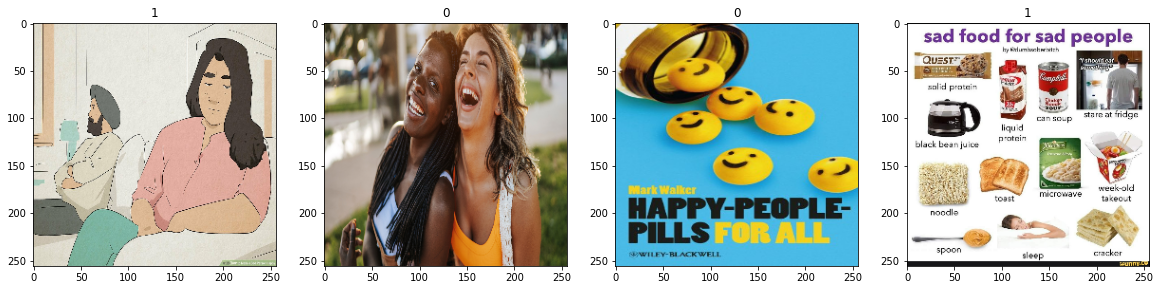

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
  #sad=1 and happy =0

##Lets pre-process our images
lets scale the image between 0 and 1 to help the model generalize faster and inproves results
split data into training, testing and validation so we do not overfit

In [33]:
#scale data
# remember our batch is compose of 2 dimension, labels and images
batch[0] #images
batch[1]# labels

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [34]:
#the images has 32 images and dimension are 256 by 256
batch[0].shape

(32, 256, 256, 3)

In [35]:
#to scale the values btm 0 and 1 divide by 255 
scaled= batch[0]/255

In [36]:
scaled.min()

0.0

In [37]:
scaled.max()

1.0

In [66]:
#how to scaled using the data pipeline
data = data.map(lambda x,y: (x/255, y)) #data transformation

In [67]:
scaled_iterator= data.as_numpy_iterator().next()

In [68]:
data.as_numpy_iterator().next()[0].min()

0.0

In [69]:
data.as_numpy_iterator().next()[0].max()

1.0

split the data

In [70]:
len(data)

6

In [82]:
train_size = int(len(data) *.7)
val_size = int(len(data)*.2)
test_size =int(len(data) *.1)+ 1

In [83]:
size = train_size + val_size + test_size
print(size)
print(val_size)
print(train_size)
print(test_size)


6
1
4
1


In [84]:
# separating using keras
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [85]:
len(test)

1

Deep Model

In [88]:

#build the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [89]:
model = Sequential()

In [90]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [91]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [93]:
#train
logdir = 'logs'

In [94]:
tensorboard_callback =  tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 17s 3s/step - loss: 1.4138 - accuracy: 0.4531 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 14s 3s/step - loss: 0.6744 - accuracy: 0.5000 - val_loss: 0.6341 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 17s 4s/step - loss: 0.6606 - accuracy: 0.5078 - val_loss: 0.6159 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 21s 3s/step - loss: 0.6207 - accuracy: 0.5859 - val_loss: 0.6527 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 16s 3s/step - loss: 0.5878 - accuracy: 0.8047 - val_loss: 0.5682 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 15s 3s/step - loss: 0.5285 - accuracy: 0.6875 - val_loss: 0.4954 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 16s 4s/step - loss: 0.4659 - accuracy: 0.8438 - val_loss: 0.4722 - val_accuracy: 0.8750
Epoch 8/20
4/4 [==================

In [95]:
hist.history


{'loss': [1.413805365562439,
  0.674362301826477,
  0.6606270670890808,
  0.6206912994384766,
  0.5878062844276428,
  0.5285108089447021,
  0.46589964628219604,
  0.3824819326400757,
  0.3317488431930542,
  0.3102142810821533,
  0.244097501039505,
  0.1776093691587448,
  0.13255690038204193,
  0.11223022639751434,
  0.07059209793806076,
  0.0531211718916893,
  0.04221237078309059,
  0.045975957065820694,
  0.040494076907634735,
  0.028348425403237343],
 'accuracy': [0.453125,
  0.5,
  0.5078125,
  0.5859375,
  0.8046875,
  0.6875,
  0.84375,
  0.8984375,
  0.875,
  0.875,
  0.9296875,
  0.96875,
  0.9609375,
  0.96875,
  0.9921875,
  1.0,
  0.9921875,
  0.9921875,
  0.9921875,
  1.0],
 'val_loss': [0.7015563249588013,
  0.6340513229370117,
  0.6158676147460938,
  0.6526875495910645,
  0.5682471990585327,
  0.49539101123809814,
  0.47218796610832214,
  0.2838539779186249,
  0.2625357508659363,
  0.11974135786294937,
  0.17568844556808472,
  0.13879957795143127,
  0.03936830163002014,
  

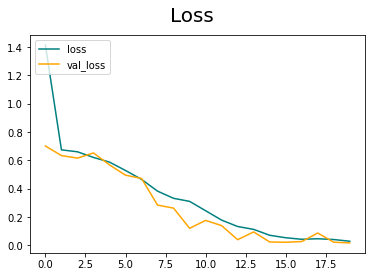

In [96]:
#plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

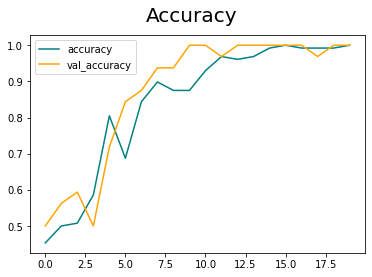

In [97]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

evaulate performance

In [104]:
#evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [105]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy() 

In [106]:
len(test)

1

In [107]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 76ms/step


In [108]:
print(f'precision:{precision.result().numpy()}, Recall:{  recall.result().numpy()},accuracy:{  acc.result().numpy()}')

precision:1.0, Recall:1.0,accuracy:1.0


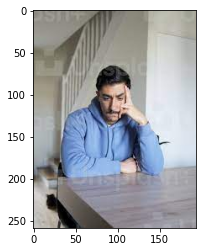

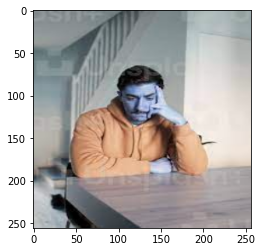

In [131]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [132]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 38ms/step


array([[0.9572727]], dtype=float32)

In [133]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [141]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


In [142]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
